<h2> Shirley Yurani Pereira Cubillos </h2>
<h3>Pasos de la Actividad - regresión logistica  presencia de enfermedad cardiaca</h3>
<h4> 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. </h4>

In [2]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
dataset = pd.read_csv('./dataset.csv')

In [4]:
dataset.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,0,2,120,178,1,0,96,0,0.0,0,0,0,0
96,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1
97,59,1,2,150,212,1,0,157,0,1.6,0,0,0,0
98,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos colesterol ')

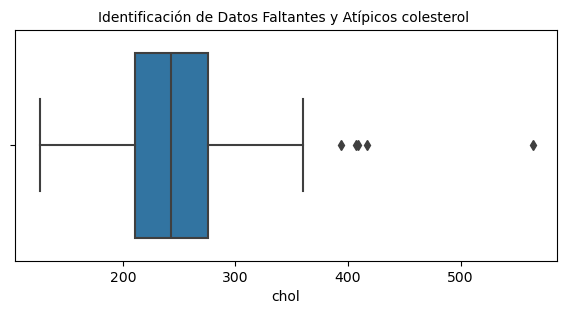

In [9]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=dataset['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos colesterol ', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos ')

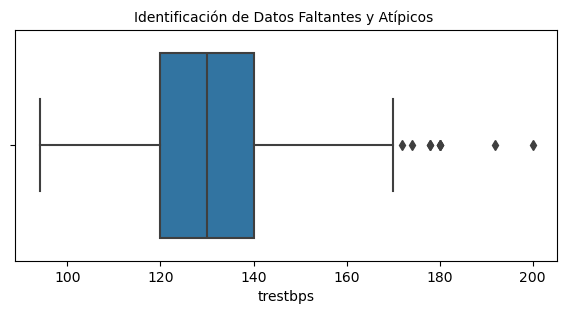

In [11]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=dataset['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos ', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos ')

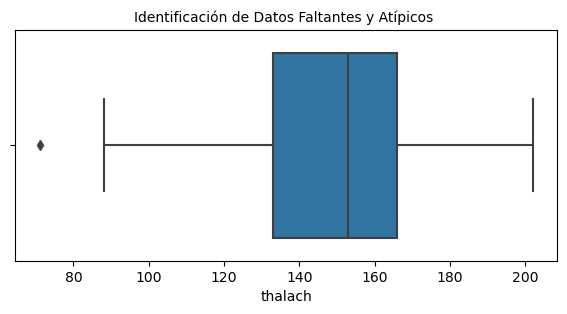

In [10]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=dataset['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos ', fontsize=10 )

 <h4>2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario</h4>

In [12]:
print("Cantidad de Registros con cero en age: ",dataset['age'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps: ",dataset['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol: ",dataset['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach: ",dataset['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",dataset['oldpeak'].isin([0]).sum()) 

Cantidad de Registros con cero en age:  0
Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en chol:  0
Cantidad de Registros con cero en thalach:  0
Cantidad de Registros con cero en oldpeak:  96


In [14]:
dataset['oldpeak']=dataset['oldpeak'].replace(0,dataset['oldpeak'].mean())


In [15]:
print("Cantidad de Registros con cero en oldpeak: ",dataset['oldpeak'].isin([0]).sum())

Cantidad de Registros con cero en oldpeak:  0


In [17]:
nivel_minimo=50
nivel_maximo=370
Total_Atipicos=((dataset['chol']<nivel_minimo)|(dataset['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 5


In [18]:
dataset=dataset[(dataset['chol']<nivel_maximo)&(dataset['chol']>nivel_minimo)]

In [19]:
Total_Atipicos=((dataset['chol']<nivel_minimo)|(dataset['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [20]:
nivel_minimo=80
nivel_maximo=170
Total_Atipicos=((dataset['trestbps']<nivel_minimo)|(dataset['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 9


In [21]:
dataset=dataset[(dataset['trestbps']<nivel_maximo)&(dataset['trestbps']>nivel_minimo)]

In [22]:
Total_Atipicos=((dataset['trestbps']<nivel_minimo)|(dataset['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        279 non-null    int64  
 1   sex        279 non-null    int64  
 2   cp         279 non-null    int64  
 3   trestbps   279 non-null    int64  
 4   chol       279 non-null    int64  
 5   fbs        279 non-null    int64  
 6   restecg    279 non-null    int64  
 7   thalach    279 non-null    int64  
 8   exang      279 non-null    int64  
 9   oldpeak    279 non-null    float64
 10  slope      279 non-null    int64  
 11  ca         279 non-null    int64  
 12  thal       279 non-null    int64  
 13  condition  279 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.7 KB


<h4> 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características </h4>

<h7>Característica de interes:

Condition: Si la persona tiene enfermedad cardiaca o no (0 = no tiene enfermedad cardiaca - 1 = si tiene enfermedad cardiaca)</h7>tes

In [26]:
dataset['condition'].value_counts()

condition
0    153
1    126
Name: count, dtype: int64

In [27]:
dataset[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
6,0
7,1
8,0
11,1
12,1


<h4>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo</h4>

In [28]:
X = dataset.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition
Y = dataset['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [29]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
21    38    1   0       120   231    0        0      182      1  3.800000   
56    45    0   1       130   234    0        2      175      0  0.600000   
203   60    1   3       117   230    1        0      160      1  1.400000   
150   39    0   2       138   220    0        0      152      0  1.055556   
126   50    1   2       140   233    0        0      163      0  0.600000   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
82    66    0   2       146   278    0        2      152      0  1.055556   
19    42    1   0       148   244    0        2      178      0  0.800000   
99    58    1   2       105   240    0        2      154      1  0.600000   
12    59    1   0       134   204    0        0      162      0  0.800000   
217   58    1   3       146   218    0        0      105      0  2.000000   

     slope  ca  thal  
21       1   0     2  
56       1   0     0  
203   

In [30]:
print (Y_train)

21     1
56     0
203    1
150    0
126    1
      ..
82     0
19     0
99     0
12     1
217    1
Name: condition, Length: 209, dtype: int64


<h4>5. Entrenar el modelo configurando los diferentes hiperparámetros</h4>

In [31]:
#modelo de regresion logistica
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) 

In [32]:
print (Y_test)

197    1
87     1
192    1
48     0
122    0
      ..
52     1
157    1
106    1
96     1
210    1
Name: condition, Length: 70, dtype: int64


In [33]:
print (Prediccion)

[1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1]


<h4>6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc</h4>

In [35]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        38
           1       0.93      0.81      0.87        32

    accuracy                           0.89        70
   macro avg       0.89      0.88      0.88        70
weighted avg       0.89      0.89      0.88        70



<h4>7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo</h4>

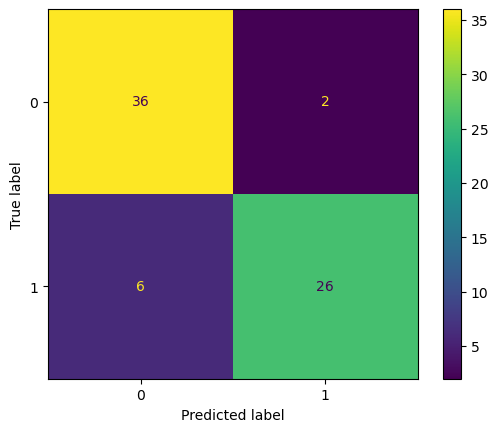

In [37]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

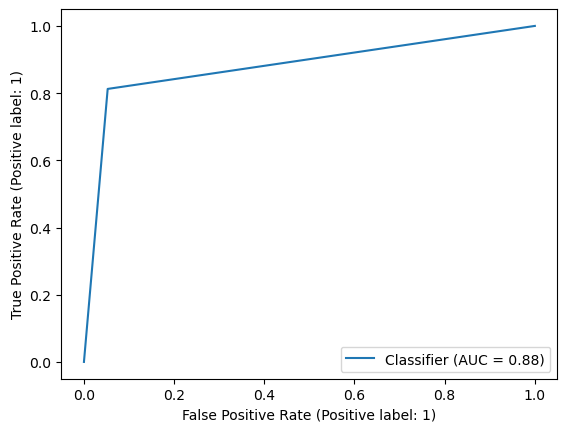

In [39]:
#curva de precisión 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

<h4>8. Interpretar, analizar y documentar los resultados obtenidos</h4>

Del desempeño del modelo podemos describir:

- La precisión se define como la proporción de predicciones positivas correctas en relación con todas las predicciones positivas emitidas por el modelo. Para la clase 'condition', la precisión es del 93%, lo que indica que el 93% de los casos identificados como enfermos cardíacos por el modelo resultaron ser correctos.

- El Recall, o la tasa de verdaderos positivos, representa la proporción de instancias positivas reales que fueron identificadas correctamente por el modelo entre todas las instancias positivas reales en el conjunto de datos. En el caso de la clase 'condition', el Recall es del 81%, lo que significa que el modelo identificó correctamente al 81% de todos los enfermos cardíacos en el conjunto de datos.

- El F1 Score, una medida que combina precisión y recall en una sola métrica, proporciona una evaluación equilibrada del desempeño del modelo. Para la clase 'condition', el F1 Score es de 0.87, lo que indica un equilibrio entre precisión y recall, demostrando una buena capacidad del modelo para identificar y clasificar casos de enfermedad cardíaca de manera precisa y exhaustiva.

De la Matriz de Confusión podemos inferir:

- Verdaderos negativos: Representan el número de observaciones que el clasificador predijo correctamente como falsas, con un total de 36 casos.
- Verdaderos positivos: Corresponden al número de observaciones que el clasificador predijo correctamente como verdaderas, contabilizando 26 casos correctamente identificados.
- Falsos positivos: Indican el número de observaciones que el clasificador predijo incorrectamente como verdaderas cuando en realidad eran falsas, con un total de 2 casos erróneos.
- Falsos negativos: Reflejan el número de observaciones que el clasificador predijo incorrectamente como falsas cuando en realidad eran verdaderas, sumando un total de 6 casos mal clasificados.dos.



De la Curva de Precisión del modelo podemos interpretar:

- El AUC (Área Bajo la Curva) es de 0.88, lo que indica que el 88% de las predicciones del clasificador son correctas en todos los umbrales de clasificación. Esta métrica proporciona una medida de la capacidad del modelo para discriminar entre clases positivas y negativas, donde un valor más cercano a 1 representa un mejor rendimiento del clasificador en la clasificación